In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras import layers, models

# ... (rest of the code remains the same)

# Build the model
model = models.Sequential([
    layers.Input(shape=(10, 10, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    # Reshape the output of the UpSampling2D layer to 5D
    # before feeding it to Conv3DTranspose
    layers.Reshape((10, 10, 1, 64)),  # Adding a depth dimension of 1
    layers.Conv3DTranspose(64, (3, 3, 3), activation='relu', padding='same'),
    layers.Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same')
])

# ... (rest of the code remains the same)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 10, 10, 1, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_transpose_4 (Conv3DTranspose) │ (None, 10, 10, 1, 64)       │         110,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_4 (Conv3D)                    │ (None, 10, 10, 1, 1)        │           1,729 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,201 (512.50 KB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.2491 - val_loss: 0.2712
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1940 - val_loss: 0.3175
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1462 - val_loss: 0.4186
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1185 - val_loss: 0.5330
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1160 - val_loss: 0.5989
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1236 - val_loss: 0.6230
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1247 - val_loss: 0.6209
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1112 - val_loss: 0.5963
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1066 - val_loss: 0.5373
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0943 - val_loss: 0.4203
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 0.3314
Test Loss: 0.33144548535346985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


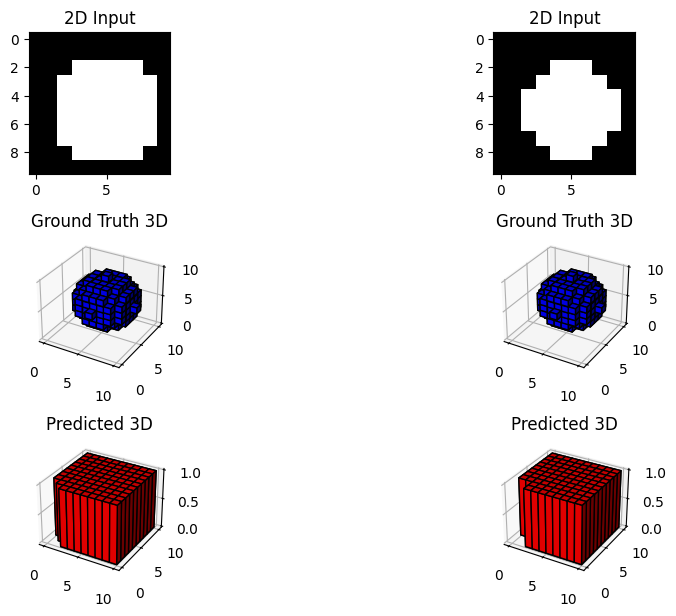

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate synthetic 2D dataset
# Let's simulate 2D projections of simple 3D shapes (cube and sphere)
def generate_dataset():
    x_data = []  # 2D projections
    y_data = []  # Corresponding 3D shapes

    # Generate cube data
    cube = np.ones((10, 10, 10))
    for i in range(10):
        x_data.append(cube[i, :, :])  # 2D slice of cube
        y_data.append(cube)          # Full 3D cube

    # Generate sphere data
    sphere = np.zeros((10, 10, 10))
    center = 5
    radius = 4
    for x in range(10):
        for y in range(10):
            for z in range(10):
                if (x - center) ** 2 + (y - center) ** 2 + (z - center) ** 2 <= radius ** 2:
                    sphere[x, y, z] = 1
    for i in range(10):
        x_data.append(sphere[i, :, :])  # 2D slice of sphere
        y_data.append(sphere)          # Full 3D sphere

    return np.array(x_data), np.array(y_data)

# Generate data
x_data, y_data = generate_dataset()

# Normalize the data
x_data = x_data / np.max(x_data)
y_data = y_data / np.max(y_data)

# Split into training and testing sets
split_index = int(len(x_data) * 0.8)
x_train, x_test = x_data[:split_index], x_data[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

# Build the model
model = models.Sequential([
    layers.Input(shape=(10, 10, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Reshape((10, 10, 1, 64)),  # Adding a depth dimension of 1
    layers.Conv3DTranspose(64, (3, 3, 3), activation='relu', padding='same'),
    layers.Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(
    x_train[..., np.newaxis],
    y_train[..., np.newaxis],
    epochs=10,
    batch_size=8,
    validation_split=0.1
)

# Evaluate the model
test_loss = model.evaluate(x_test[..., np.newaxis], y_test[..., np.newaxis])
print(f"Test Loss: {test_loss}")

# Visualize some results
n = 2
fig = plt.figure(figsize=(12, 6))
for i in range(n):
    # 2D input
    ax = fig.add_subplot(3, n, i + 1)
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title("2D Input")

    # Ground truth 3D
    ax = fig.add_subplot(3, n, n + i + 1, projection='3d')
    ax.voxels(y_test[i] > 0.5, facecolors='blue', edgecolor='k')
    ax.set_title("Ground Truth 3D")

    # Predicted 3D
    ax = fig.add_subplot(3, n, 2 * n + i + 1, projection='3d')
    prediction = model.predict(x_test[i][np.newaxis, ..., np.newaxis])[0, ..., 0]
    ax.voxels(prediction > 0.5, facecolors='red', edgecolor='k')
    ax.set_title("Predicted 3D")

plt.tight_layout()
plt.show()
